In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Capstone_Project ST1

/content/drive/MyDrive/Capstone_Project ST1


In [4]:
!ls


'Capstone ST1.ipynb'   Medical_insurance.csv   UC_student_u3246575studentID


This Project is based on Medical Insurance Price Prediction available from kaggle repository.

(https://www.kaggle.com/code/dylandsi/medical-insurance-price-prediction)

1. It contains the details (e,g, age, sex, bmi etc.)of 2773 customers.

2. My project task is to create a machine learning model which can predict the price of insurance on its characteristics.

3. For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes

#Step 1 : Reading the Dataset with Python

In [5]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

#Data Loading and Inspection:

Open a pandas DataFrame and load the dataset. Examine the dataset's initial rows to learn about its composition and the kinds of data it includes. Look for any missing values and take the proper action, such as imputing the missing values or, if required, deleting the rows or columns that contain the missing data. Examine the data for any abnormalities or discrepancies that could require attention.

In [6]:
# Reading the dataset
import pandas as pd
import numpy as np
insurance_data=pd.read_csv('/content/drive/MyDrive/Capstone_Project ST1/Medical_insurance.csv', encoding='latin')
print('Shape before deleting duplicate values:', insurance_data.shape)

# Removing duplicate rows if any
insurance_data=insurance_data.drop_duplicates()
print('Shape After deleting duplicate values:', insurance_data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
insurance_data.head(10)

Shape before deleting duplicate values: (2772, 7)
Shape After deleting duplicate values: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#Key observations from Step 1 about Data Description
* From the medical insurance dataset, this file includes information on 2773 insurance customers. The total number of characteristics in this case is 7.
* Age, sex, bmi, children, amoker, area, and charges are the entities.
* This is the body mass index, or BMI.
* Prior to removing duplicate entries, shape was: (2772, 7)
* Form Following the removal of duplicate values: (1337, 7)

##Step 2 :Problem Statement Definition
Create a machine learning model that forecast a person's medical costs based on their age, gender, BMI, number of children, smoking status, and geographic location. In order to help the insurance company decide on price and risk assessment, the model should give precise predictions of medical costs for new clients.

##Step 3 : Target Variable Identification

In [6]:
import pandas as pd

# Load the medical insurance dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Capstone_Project ST1/Medical_insurance.csv')

# Check column names
print(insurance_data.columns)

# Inspect the dataset
print(insurance_data.head())

# Extract the target variable if the column name is correct
if 'charges' in insurance_data.columns:
    target_variable = insurance_data['charges']
    print(target_variable)
else:
    print("Column 'charges' not found in the dataset.")

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


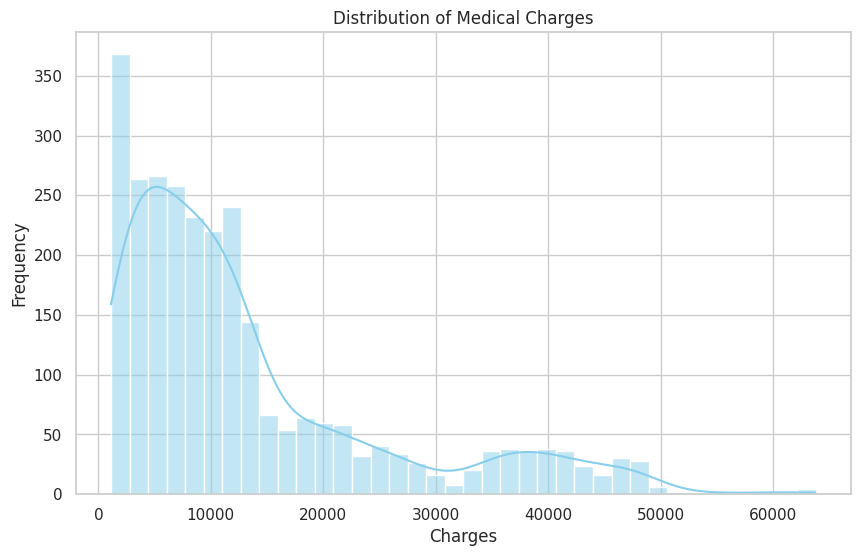

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Plot the distribution of charges
sns.histplot(insurance_data['charges'], kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#Step 4: Choosing the appropriate ML/AI Algorithm for Data Analysis.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Capstone_Project ST1/Medical_insurance.csv')

# Perform one-hot encoding for categorical variables
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

# Prepare the data
X = insurance_data_encoded.drop(columns=['charges'])
y = insurance_data_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 1269.770368409009
Mean Squared Error: 7377638.279722549
R-squared: 0.9519312466154424


#Step 5 :Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.)

* Predictive modelling will produce subpar results if the target variable's distribution is too skewed.

* Although a bell curve is ideal, a little positive or negative skew is acceptable as well.

* A bell curve or a slightly skewed variation of it must appear on the histogram when designing and analysing the Regression method.

* If not, it affects the capacity of the machine learning algorithms to extract all possible situations from the data.

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have loaded the medical insurance dataset into a variable named 'insurance_data'
# Replace 'insurance_data' with the appropriate variable name if it's different
insurance_data['charges'].hist()

plt.title('Distribution of Medical Expenses (Charges)')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.show()

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
insurance_data['charges'].hist()

#Step 6 :Visualising the distribution of Target variable

With the help of this code, a histogram illustrating the distribution of medical costs and expenses among the dataset's participants will be produced. To better the visualisation, change the colours and number of bins as necessary.

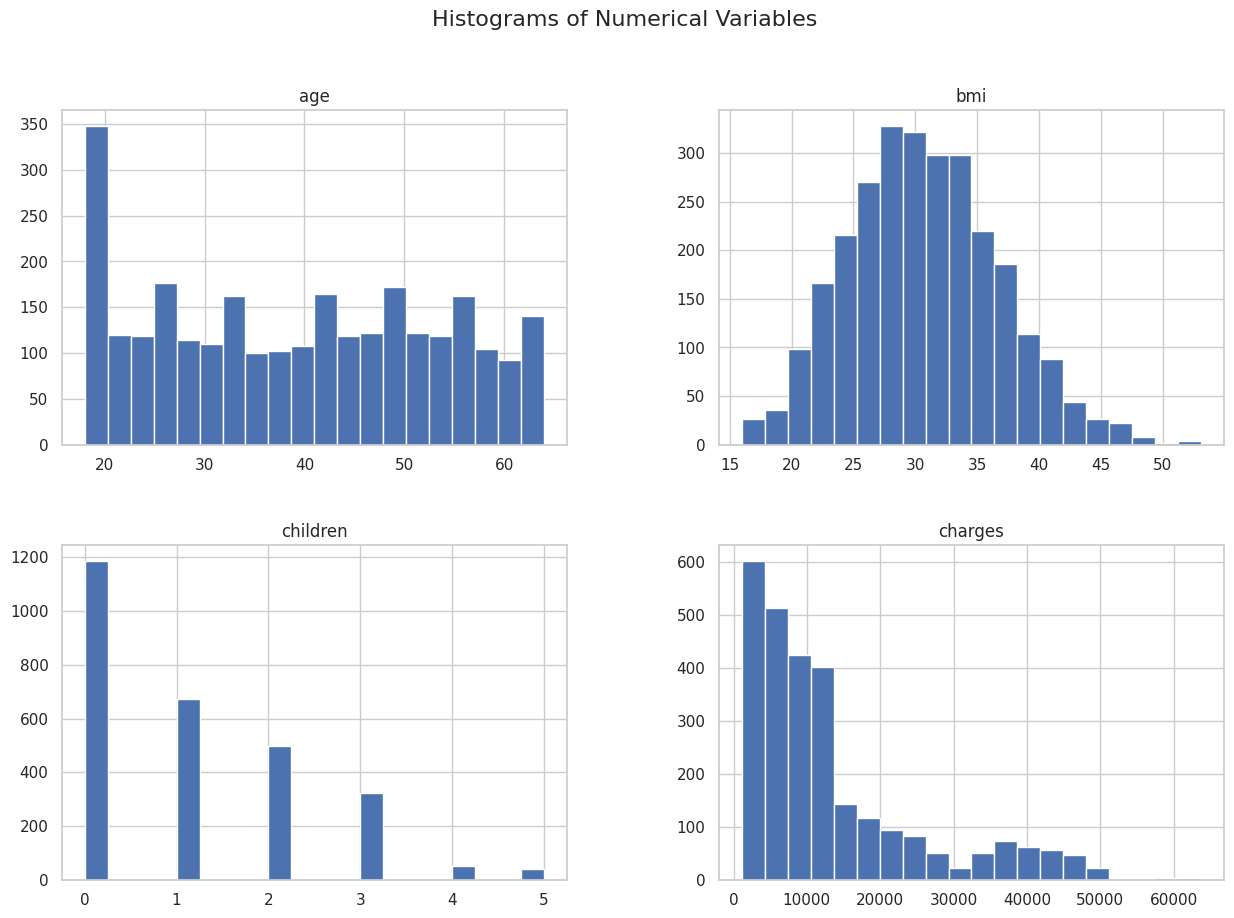

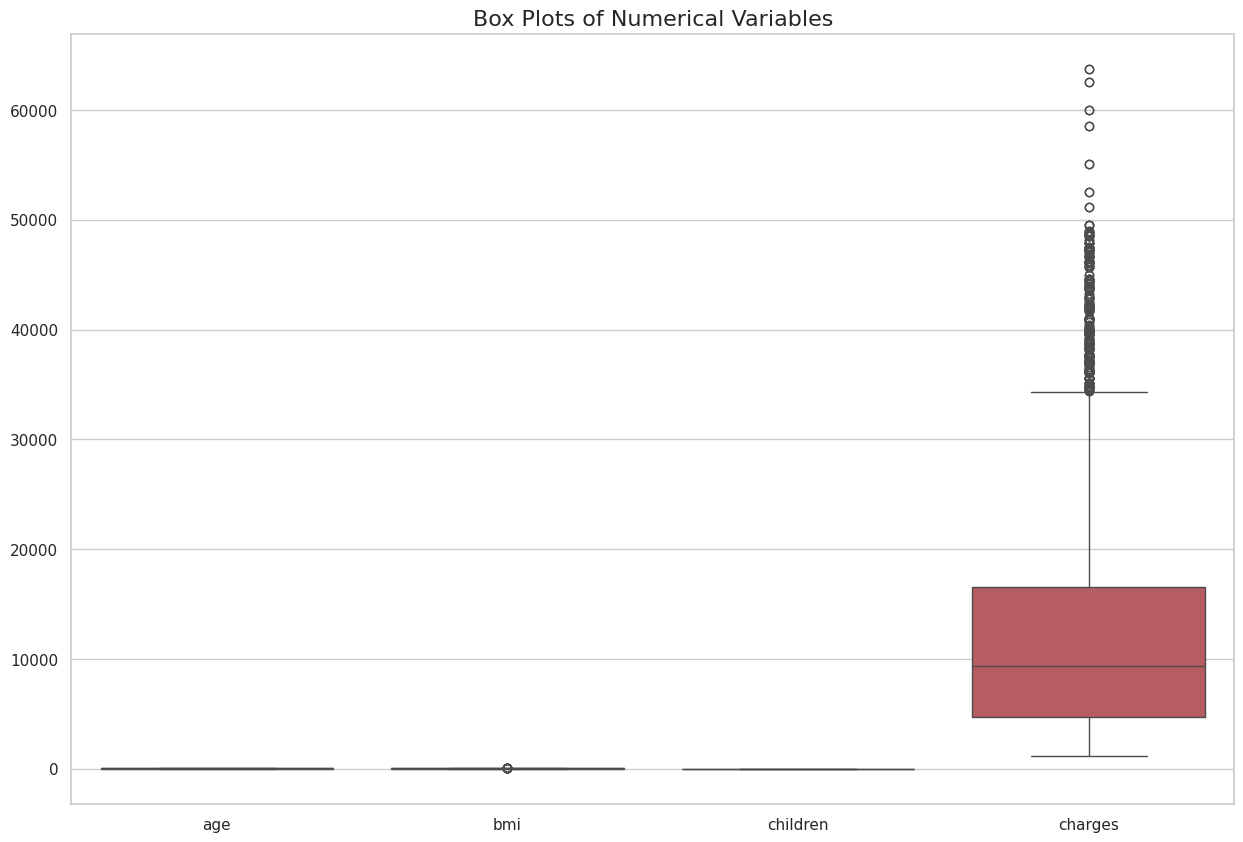

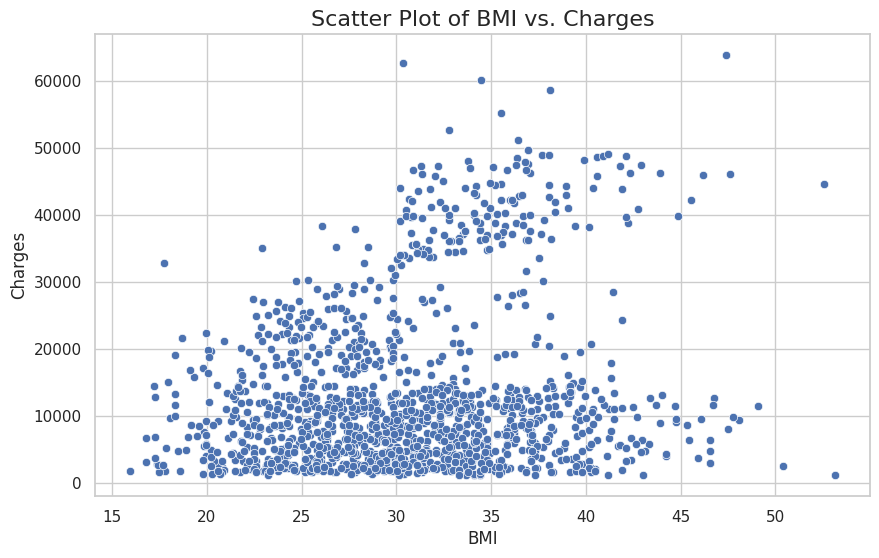

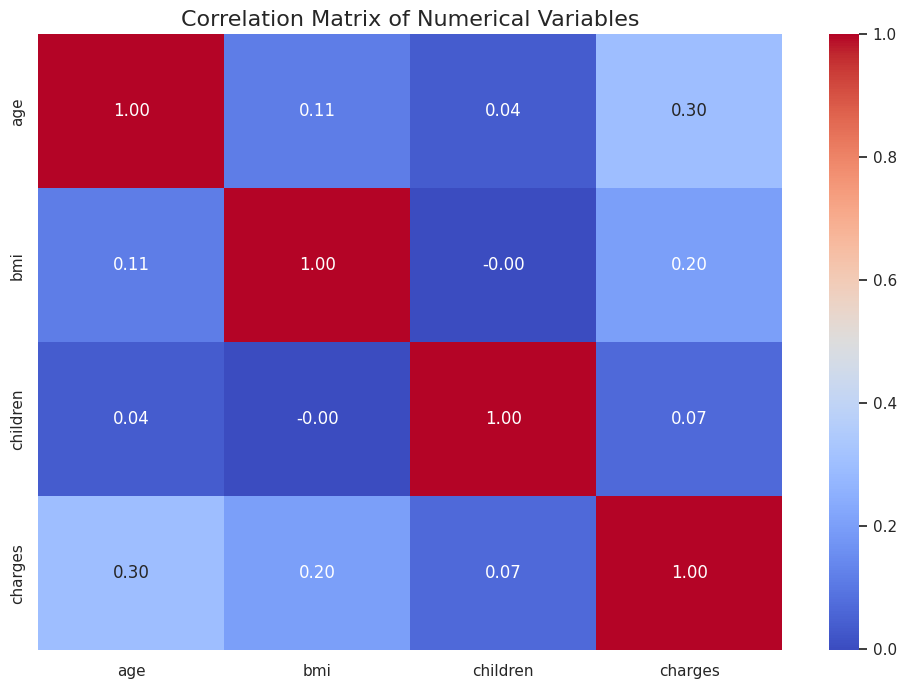

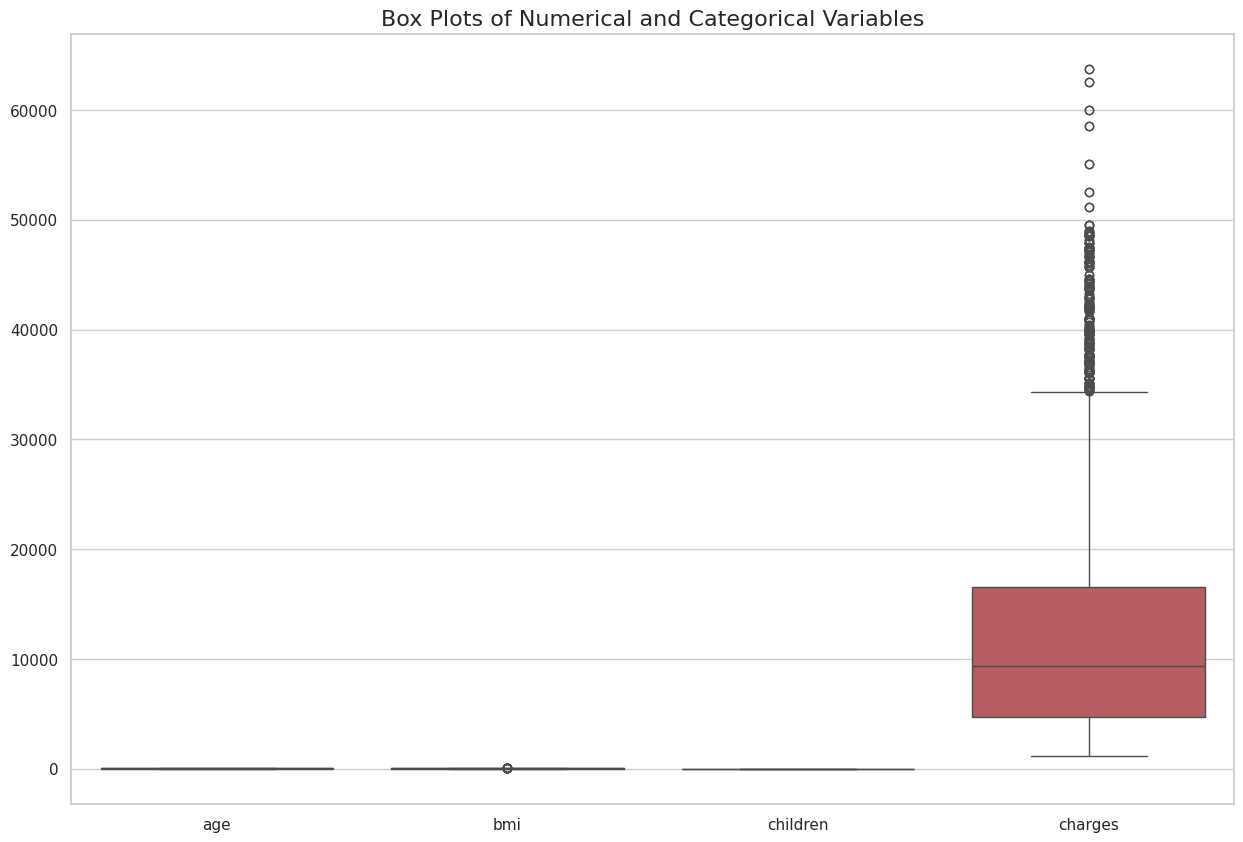

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the medical insurance dataset
insurance_data = pd.read_csv('/content/drive/MyDrive/Capstone_Project ST1/Medical_insurance.csv')

# Define numerical and categorical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']
categorical_columns = ['sex', 'smoker', 'region']

# Explore the distributions of variables through visualizations
# Histograms for numerical variables
insurance_data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=insurance_data[numerical_columns])
plt.title('Box Plots of Numerical Variables', fontsize=16)
plt.show()

# Scatter plot for BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance_data)
plt.title('Scatter Plot of BMI vs. Charges', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Investigate correlations between numerical variables
correlation_matrix = insurance_data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

# Box plots for numerical and categorical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=insurance_data[numerical_columns + categorical_columns])
plt.title('Box Plots of Numerical and Categorical Variables', fontsize=16)
plt.show()

#Observations from previous step
It is good to move forward with the target variable's data distribution. For each kind of value to be learned from, there are enough rows.

#Step 7: Basic Exploratory Data Analysis
* The purpose of this stage is to assess the total data.

* The amount of data and the kinds of columns that are there.

* The first step in analysing the data is to determine which columns are categorical, quantitative, or qualitative.

* This stage aids in the beginning of the data/column rejection procedure.

* You need to carefully examine each column and consider whether it has an impact on the Target variable's or the Class's values.

* You could wonder, for instance, if this column in this dataset influences the house's price.

* Immediately delete the column from the data if the response is an unequivocal "No"; else, retain the column for additional analysis.

* In Python, there are four commands used for basic data exploratory analysis.

* head(): This makes a few sample rows of the data easier to see.

* info(): This offers the data's distilled information.

* describe(): This gives the data's descriptive statistical specifics.

* nunique(): This function aids in determining whether a column is continuous or categorical.

In [31]:
# Looking at sample rows in the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Looking at sample rows in the data
insurance_data.tail()

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
insurance_data.info()

In [ ]:
# Looking at the descriptive statistics of the data
insurance_data.describe(include='all')

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
insurance_data.nunique()

#Observations from Step 7 - Basic Exploratory Data Analysis
* After conducting the aforementioned basic research, you can now compile the data into a straightforward report by writing your findings about each column.

* As a result, drafting a preliminary plan for more research.

* The columns that were chosen in this stage are not final; further research will be conducted before a final list is produced.

* age - Continuous. Selected.
* sex - Categorical. Selected.
* bmi - Continuous. Selected.
* children - Categorical. Selected.
* smoker - Categorical. Selected.
* region - Categorical. Selected.
* charges are ongoing. chosen. This is the variable that the suggested regression model needs to predict—the Target or Class Variable!

#Step 8 :Identifying and Rejecting useless columns
1. The data does not contain any qualitative columns.
2. Therefore, no column has to be removed.

#Step 9 :Visual Exploratory Data Analysis of data (with Histogramand Barcharts)
* Use bar plots to see the distribution of each categorical predictor variable in the data.

* By examining the distinct values within the data, we may identify a category variable.

* A categorical variable can be used to categorise data based on its unique values if it has fewer than 20 unique values AND repeating values.

* We were able to identify two category predictors in the data based on the Basic Exploration Data Analysis from the previous stage.

* Categorical Predictors:

* 'sex'

* 'children'

* 'smoker'

* 'region'

* To visualise the distribution of the data for these category columns, bar charts will be used.

In [32]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=insurance_data, colsToPlot=['sex','children','smoker','region'])

#Observation from Step 9 - Visual Exploratory Data Analysis
* The two data columns may now be analysed thanks to bar charts.
* In bar charts, the X-axis shows the names of the categories, while the Y-axis shows the frequencies of each category.

* The frequency of each category in the ideal bar chart is equivalent.
* Because there are sufficient rows in the data for each category, the ML/AI regression algorithm is able to learn as a result.
* A highly skewed column in a chart indicates that one bar is especially prominent while the others have relatively few occurrences.
* These sorts of columns might not be very helpful in building machine learning models.
* We may confirm this when the correlation analysis phase draws near and decide whether or not to accept the column/data attribute in the end.
* The biassed nature of "sex" and "smoker" in this dataset should be noted.
The other bar contains very few rows, and the controlling bar is merely one.
* It's conceivable that these columns have nothing to teach us and are unrelated to the target variable.
* The algorithms are unable to identify any rules such as "the target variable is that when the value is this."
* 'sex', 'children','smoker','region': a few categories Two category variables have been selected for further analysis.

#Step 10 :Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are eleven continuous predictor variables 'age', 'bmi', 'charges'

In [ ]:
# Plotting histograms of multiple columns together
insurance_data.hist(['age', 'bmi', 'charges'], figsize=(20,12))

#Step 11 :Feature Selection based on data distribution

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
insurance_data = pd.read_csv('Medical_insurance.csv')

# Perform one-hot encoding for categorical variables
categorical_columns = ['sex', 'smoker', 'region']  # Ensure column names are lowercase
insurance_data_encoded = pd.get_dummies(insurance_data, columns=categorical_columns)

# Define features and target variable
X = insurance_data_encoded.drop(columns=['charges'])  # Features
y = insurance_data_encoded['charges']  # Target variable

# Use statistical tests to determine feature importance
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Feature Importance Scores:")
print(feature_scores)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

# Select top k features based on importance scores
k = 5  # Example: Select top 5 features
selected_features = feature_scores['Feature'].head(k).tolist()
print("Selected Features:", selected_features)

# Train a machine learning model using selected features
X_selected = X[selected_features]
model = RandomForestRegressor()
model.fit(X_selected, y)

#Step 12: Outlier Analysis
* In data, outliers are extreme values that deviate significantly from the majority of values.

* In the histogram, they are represented by the tails.

* One column or data attribute at a time must be handled for outliers.

* Since every column will receive a somewhat different treatment

* Why should I examine the outliers?

* The construction of machine learning models is biassed by outliers.

* The algorithm ignores the rest of the data in an attempt to suit the extreme value.

* The two methods for handling data outliers are described below.

* First option: Get rid of the outlier records. only if a small number of rows are missing.

* Second Option: Apply a rational commercial value to the outlier data.

* Using the histogram, let's determine the most sensible number to substitute for outliers.

In [ ]:
#Replacing outliers for 'charges'
# Finding nearest values to 6500 mark
insurance_data[insurance_data['charges']<6500].sort_values(by='charges',ascending=False)

,age,sex,bmi,children,smoker,region,charges
2563,40,female,27.40,1,no,southwest,6496.8860
1177,40,female,27.40,1,no,southwest,6496.8860
1255,42,female,37.90,0,no,southwest,6474.0130
2641,42,female,37.90,0,no,southwest,6474.0130
2559,38,male,29.26,2,no,northwest,6457.8434
...,...,...,...,...,...,...,...
808,18,male,30.14,0,no,southeast,1131.5066
940,18,male,23.21,0,no,southeast,1121.8739
2326,18,male,23.21,0,no,southeast,1121.8739
1373,18,male,23.21,0,no,southeast,1121.8739


Observation: As the above result indicates that 6496.8860 is the closest logical number, any value over 6500 should be replaced with it.

In [ ]:
# Replacing outliers with nearest possibe value
insurance_data['charges'][insurance_data['charges']>6500] =6496.8860

#Step 13 : Removal of outliers and missing values

In [ ]:
insurance_data.hist(['charges'], figsize=(18,5))

##Observation from Step 13
* After the outlier treatment, the distribution is now better.
* The tail is still there, but it is thick, indicating that a wide range of values fall inside it, making it acceptable.

#Step 14: Missing Values Analysis
* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
insurance_data.isnull().sum()

#Observations from Step 14: Missing Value Analysis
* This data has no missing values!
* Therefore, there is no need to remove any data samples (rows).

#Step 15: Feature Selection (Attribute Selection)
* The best columns (Features) that are connected with the target variable should now be chosen.

* Chi-Square testing, ANOVA analysis, and correlation value measurement may all be used to accomplish this directly.

* To better understand the data, it is usually beneficial to see the relationship between each predictor (feature) and the target variable or class variable.

* Some methods for calculating the statistical strength and visualising the link between two variables are listed below.

**Visual exploration of relationship between variables**

* Scatter Plot --- Continuous vs. Continuous

* Box Plot: Categorical versus Continuous

* Grouped Bar Plots: Categorical vs Categorical

* Measuring the statistical strength of the link between variables

* Constant vs Constant ---- matrix of correlations

* ANOVA test for categorical versus continuous data

* Chi-Square test for categorical vs categorical

* Since the target variable for this dataset is continuous, the next two eventualities require consideration.

* Continuous Predictor vs. Continuous Target Variable

* Continuous Goal Variable vs Discrete Predictor

#Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* A metric known as the pearson's correlation value may be used to evaluate the strength of the association between two continuous variables, such as the target and predictor, and to visualise it using a scatter plot.

In [ ]:
ContinuousCols=['age','bmi']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
   insurance_data.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

# Scatter charts interpretation
* Scatter charts are excellent visual aids for figuring out how two variables relate to one another.

* **Increasing Trend:** Positive correlation is shown when points cluster in a way that resembles an upward slope from left to right. This implies that the other variable tends to rise together with the increase in the first. It's useful for machine learning as it suggests a possible correlation for prediction.

* **Decreasing Trend:** On the other hand, a downward slope formed by the points from left to right indicates a negative association. In this case, one variable tends to decrease as the other grows. This is advantageous for developing machine learning models, much like a growing trend. No Trend: It indicates that there is little to no connection between the variables if there is no discernible pattern or trend. In this instance, it would not be very beneficial to use this prediction as a feature in machine learning.

* We can determine whether or not the predictor will be beneficial based on this chart. In the following step, you verify this by examining the correlation value.

#Step 16: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
* One useful statistic for achieving this is Pearson's correlation coefficient.
* The calculation is as easy as dividing the product of the standard deviations of the two characteristics (denominator) by the covariance between them (numerator), x and y.:
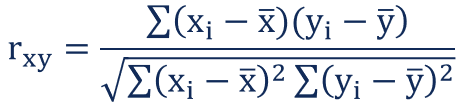
* You can only compute this value between two numerical columns. When the correlation between [-1,0] is inversely proportionate, a downward trend will be shown in the scatter plot.

* When there is a straight proportionality between {0,1}, the scatter plot displays an increasing trend.
Relationship close to {0} means No association, no discernible trend will be shown in the scatter plot.
* A positive correlation between two variables is shown if the correlation value is greater than 0.5; the sign is irrelevant.
* To determine whether columns, characteristics, or predictors are truly connected to the target variable under consideration, we look at the correlations between the target variable and any other predictor variable(s).

In [ ]:
# Calculating correlation matrix
ContinuousCols=['age', 'charges', 'bmi',]

# Creating the correlation matrix
CorrelationData=insurance_data[ContinuousCols].corr()
CorrelationData

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.5 ]

#Observations from Step 16
* Final selected Continuous columns:

* 'age'

#Step 17: Relationship exploration: Categorical Vs Continuous -- Box Plots
* Use Boxplots to analyse the relationship when the predictor variable is categorical and the target variable is continuous.
* Use the Anova test to determine the strength of the relationship.

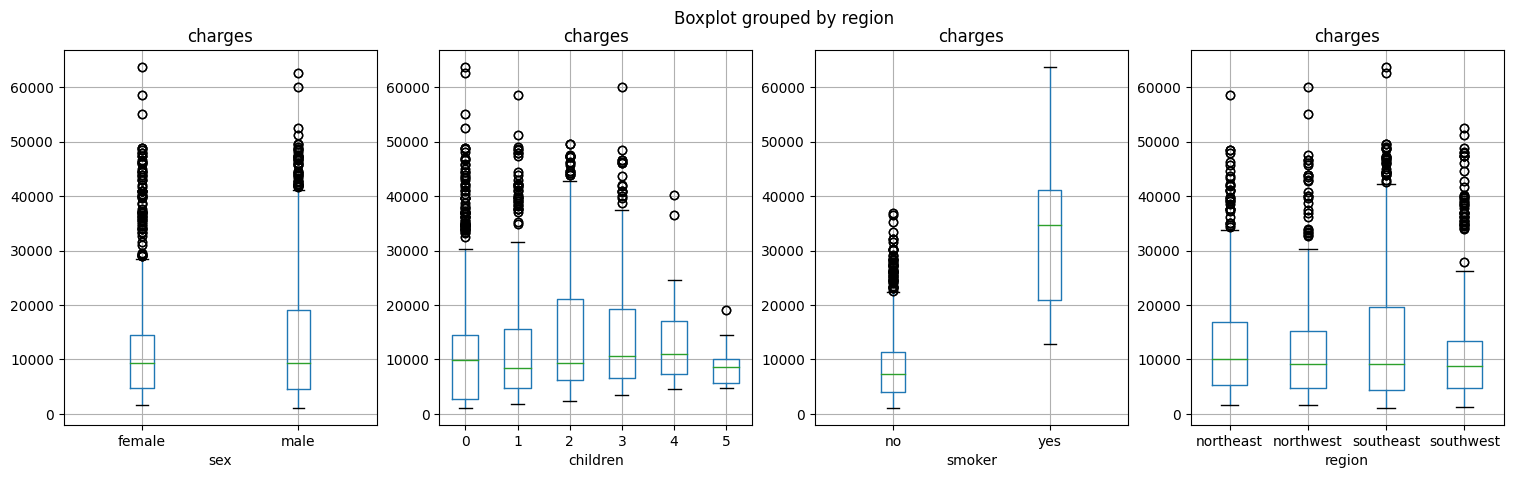

In [4]:
# Box plots for continuous Target Variable "charges" and Categorical predictors
CategoricalColsList=['sex', 'children', 'smoker', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    insurance_data.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#Observations from Step 17: Box-Plots interpretation
* For every category on the X-Axis, these graphs provide an indication of the data distribution of the continuous predictor in the Y-axis.

* The continuous variable has NO influence on the target variable if the distribution for each category is comparable (boxes are on the same line). As a result, there is no correlation between the variables.

* On the other hand, if each category's distribution differs (the boxes aren't all on the same line!). It suggests a possible correlation between these factors and MEDV.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We verify this by examining the ANOVA test results below.

#Step 18: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
* Analysis of variance (ANOVA) is used to determine if the provided continuous and categorical variables are related in any way.

* Presumption (H0) Null Hypothesis: The provided variables have no relationship with one another (i.e.

* The numeric Target variable's average (mean) values are the same for each group in the category Predictor variable.

* Results of the ANOVA test: Probability that H0 (the null hypothesis) is correct

In [12]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [13]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['sex', 'children', 'smoker', 'region']
FunctionAnova(inpData=insurance_data,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is correlated with charges | P-Value: 0.033820791995078286
children is correlated with charges | P-Value: 0.006133448188169501
smoker is correlated with charges | P-Value: 1.4067220949358597e-282
region is correlated with charges | P-Value: 0.03276288025444947


['sex', 'children', 'smoker', 'region']

#Observations from Step 18
* The ANOVA results validate the visual analysis we performed with the aforementioned box plots.

* Every category component, other from "sex," has a link with the dependent variable.

* We can deduce this data from the box plots!

* The last group of selected categories:

  **'children, smokers, and area'**

#Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive testing utilising exploratory data analysis, we may select the following final features, predictors, and columns for the machine learning model construction:
* **'age', 'children','smoker','region'**.

In [15]:
SelectedColumns=['age', 'children', 'smoker', 'region']

# Selecting final columns
DataForML=insurance_data[SelectedColumns]
DataForML.head()

,age,children,smoker,region
0,19,0,yes,southwest
1,18,1,no,southeast
2,28,3,no,southeast
3,33,0,no,northwest
4,32,0,no,northwest


In [16]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## **Step 19: Data Pre-processing for Machine Learning Model Building or Model Development**
* A list of actions that must be taken about predictor variables before machine learning can be applied to the data

* Converting each column with ordinal categorisation to numeric data

* Changing Binary Nominal 1/0 mapping from categorical columns to numeric

* Using pd.get_dummies(), converting the other nominal category columns to numeric

* Data Transformation (Optional): log/sqrt, normalisation, standardisation, and log. crucial if you're utilising neural networks or distance-based techniques like KNN

* Converting the ordinal variable to numeric: No ordinal categorical variable exists in this set of data.

* Using 1/0 mapping to convert the binary nominal variable to numeric: This data does not contain any binary nominal variables in string format.

## Converting the nominal variable to numeric using get_dummies()

In [17]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['charges']=insurance_data['charges']

# Printing sample rows
DataForML_Numeric.head()

,age,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,False,True,False,False,False,True,16884.92400
1,18,1,True,False,False,False,True,False,1725.55230
2,28,3,True,False,False,False,True,False,4449.46200
3,33,0,True,False,False,True,False,False,21984.47061
4,32,0,True,False,False,True,False,False,3866.85520


## **Step 20: Machine Learning Model Development:**
dividing the data into samples for training and testing

* The entire set of data (training data) is not used in the model's creation.


* A random subset of the data is retained to assess the model's performance.

* The remaining data, which is used to build the model, is referred to as training data. This is known as testing data.

* Usually, 30% of the data is used for teaching purposes and the remaining 70% is used for training.

In [18]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'children', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges'],
      dtype='object')

In [19]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'children', ]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## **Step 21: Standardization/Normalization of data**
* If we wish to compare the accuracy of the transformed data with the accuracy of the raw data, we can opt not to execute this step (Optional Step).

* This step is required, though, if we are utilising KNN or Neural Networks.

In [22]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## **Step 22: Multiple Linear Regression Algorithm For ML/AI model building**

In [23]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.08832233355763253

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885           14553.0
1  0.239130       0.8   5708.86700           12906.0
2  0.717391       0.6  11436.73815           17306.0
3  0.282609       0.6  38746.35510           12614.0
4  0.282609       0.4   4463.20510           11853.0
Mean Accuracy on test data: -10.97454624611504
Median Accuracy on test data: 28.653911251532122

Accuracy values for 10-fold Cross Validation:
 [-13.72947154 -16.75758019  -3.36254617 -24.04001664  -9.41653952
 -20.15826111 -19.48890822  -4.42706695   0.77646804 -19.44395679]

Final Average Accuracy of the model: -13.0


#Decision Regressor Tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.16739995186509282

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885           13746.0
1  0.239130       0.8   5708.86700           10482.0
2  0.717391       0.6  11436.73815           20298.0
3  0.282609       0.6  38746.35510            9252.0
4  0.282609       0.4   4463.20510            9252.0
Mean Accuracy on test data: -16.750224883690194
Median Accuracy on test data: 30.27726433929547

Accuracy values for 10-fold Cross Validation:
 [-17.76066332 -17.21141732  -9.420371   -25.19883198 -11.44627792
 -23.44803307 -23.20586818  -1.2507566    4.10826246 -13.40959739]

Final Average Accuracy of the model: -13.82


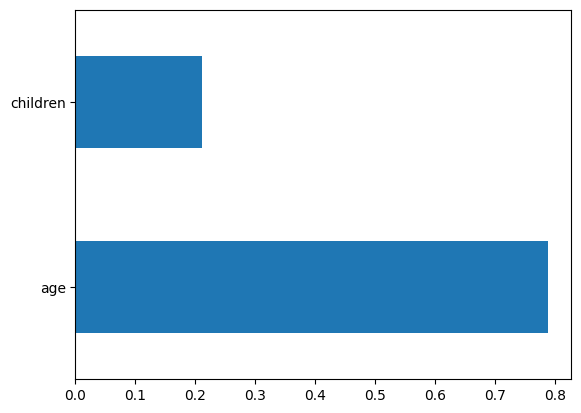

In [24]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting/Visualising the Decision Tree

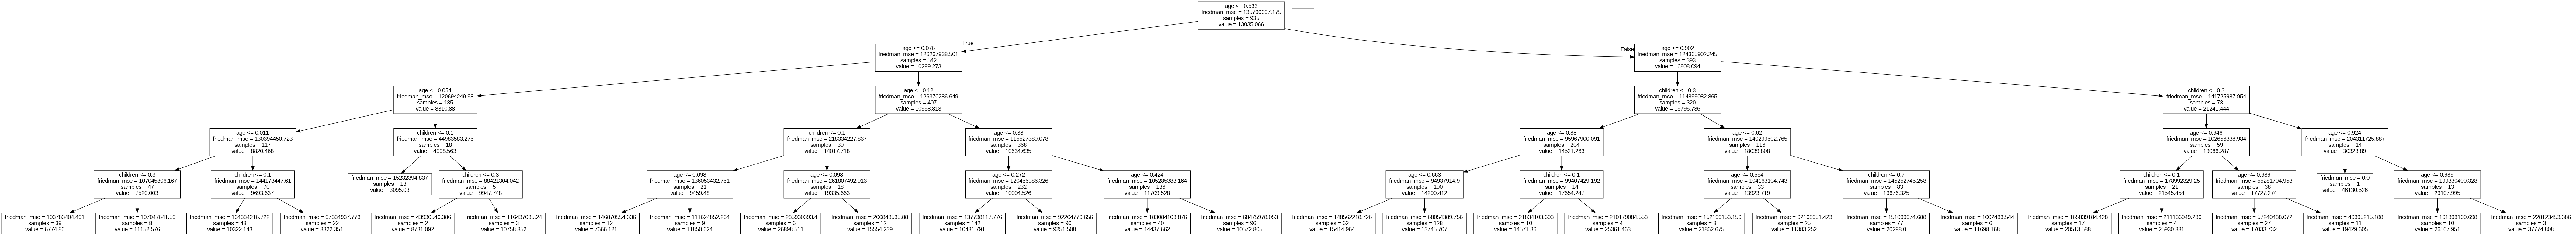

In [25]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in

#Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.16137053429440673

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885           14198.0
1  0.239130       0.8   5708.86700           10689.0
2  0.717391       0.6  11436.73815           20191.0
3  0.282609       0.6  38746.35510           10046.0
4  0.282609       0.4   4463.20510           10098.0
Mean Accuracy on test data: -16.206184373653727
Median Accuracy on test data: 27.901295319965385

Accuracy values for 10-fold Cross Validation:
 [-14.12298187 -16.99602951  -7.89062997 -28.95625488 -11.71131696
 -21.06830011 -25.05023367  -3.36462282   5.31555557 -16.78480363]

Final Average Accuracy of the model: -14.06


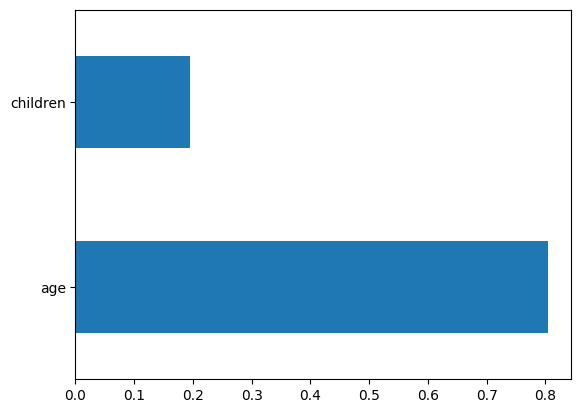

In [26]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

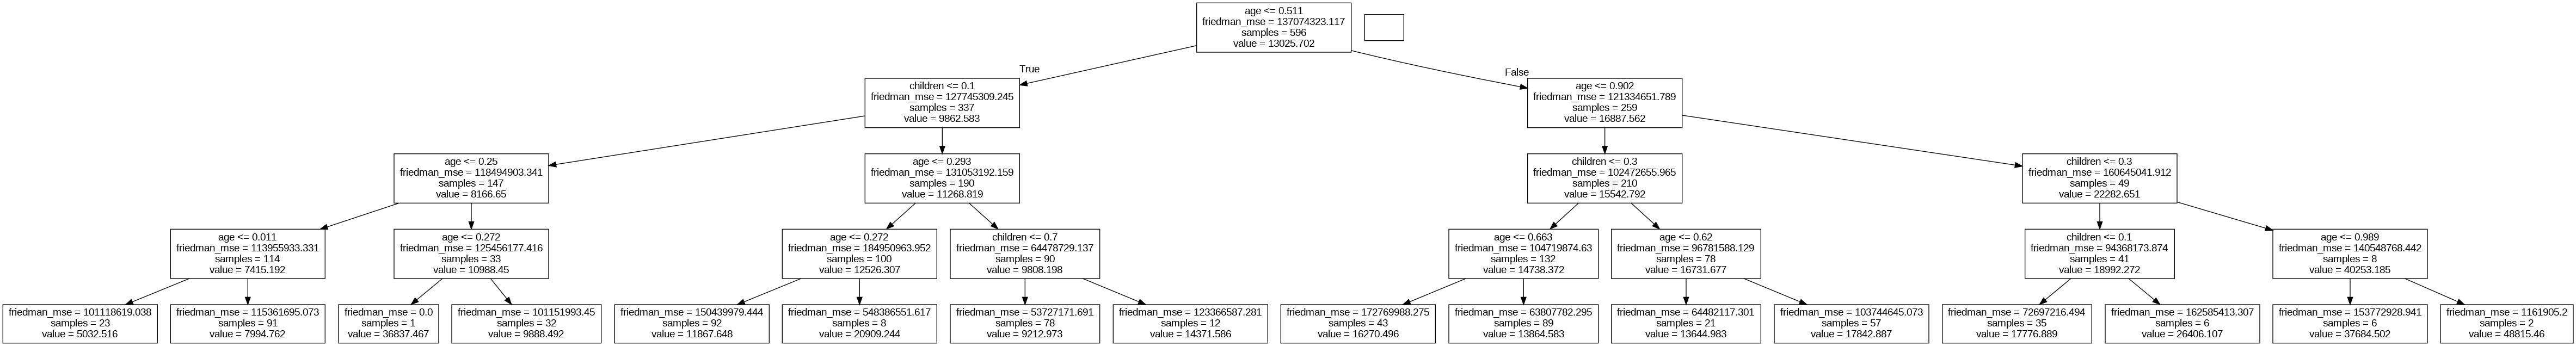

In [27]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in


## **Step 23: AdaBoost Algorithm For ML/AI model building**

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.0820647906679709

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885           17031.0
1  0.239130       0.8   5708.86700           14042.0
2  0.717391       0.6  11436.73815           20643.0
3  0.282609       0.6  38746.35510           14042.0
4  0.282609       0.4   4463.20510           14225.0
Mean Accuracy on test data: -55.78520508530934
Median Accuracy on test data: 9.641509659165223

Accuracy values for 10-fold Cross Validation:
 [-57.79792541 -61.28695099 -44.50442103 -76.99635822 -50.6429511
 -67.986468   -68.34123714 -40.99088123 -32.35924925 -64.06021583]

Final Average Accuracy of the model: -56.5


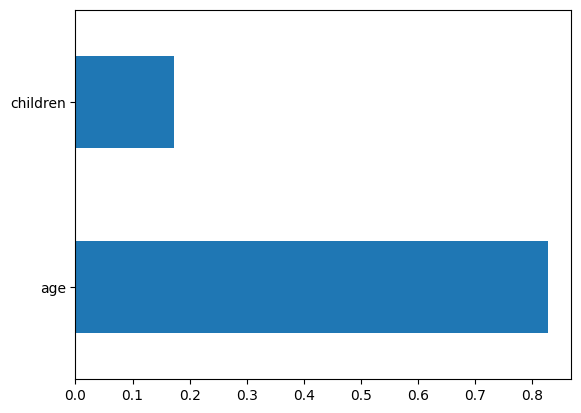

In [28]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.19666239258581908

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885           13102.0
1  0.239130       0.8   5708.86700           13808.

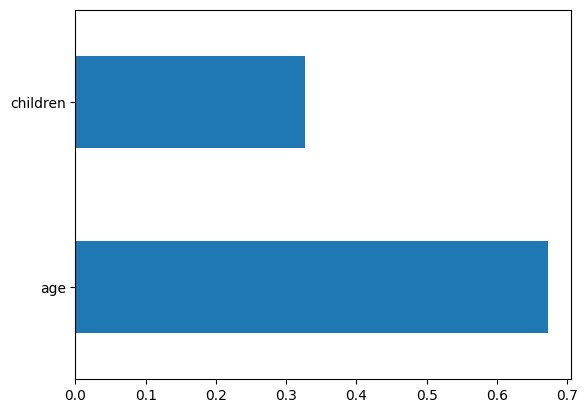

In [29]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
 TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

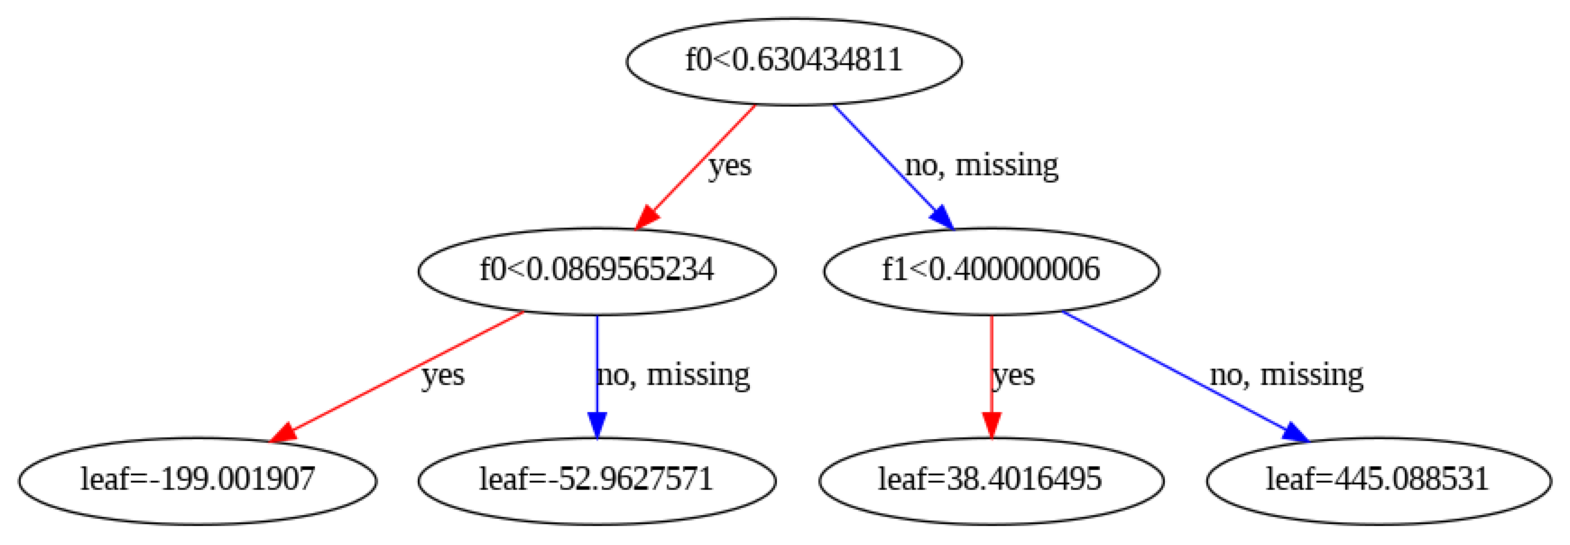

In [30]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

#K-Nearest Neighbor(KNN)

In [31]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.1271312492243203

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885           18818.0
1  0.239130       0.8   5708.86700           17401.0
2  0.717391       0.6  11436.73815           27471.0
3  0.282609       0.6  38746.35510           15124.0
4  0.282609       0.4   4463.20510            4939.0
Mean Accuracy on test data: -15.694905290900508
Median Accuracy on test data: 33.35534221800165

Accuracy values for 10-fold Cross Validation:
 [ -0.2963922  -23.60461339 -30.75301667 -17.54116479  -4.02525
 -30.28165045 -24.76320292  -7.13524088  12.56337097 -19.67766109]

Final Average Accuracy of the model: -14.55


#Support Vector Machine (SVM) Regressor

In [32]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.1032878750275057

##### Model Validation and Accuracy Calculations ##########
        age  children      charges  Predictedcharges
0  0.673913       0.0   8688.85885            9282.0
1  0.239130       0.8   5708.86700            9223.0
2  0.717391       0.6  11436.73815            9290.0
3  0.282609       0.6  38746.35510            9229.0
4  0.282609       0.4   4463.20510            9228.0
Mean Accuracy on test data: -0.06098463584798708
Median Accuracy on test data: 43.866859303389546

Accuracy values for 10-fold Cross Validation:
 [ -7.2226562   -7.17837979  11.7552478  -17.28026819   4.74831381
  -4.08244894  -4.97144686   7.99128545  18.82827519 -10.76503254]

Final Average Accuracy of the model: -0.82


#Step 24: Model Deployment

* Model deployment: We choose the approach that yields the best average accuracy based on the trials mentioned above.

* Several methods have yielded comparable average accuracy in this instance. Therefore, we are free to select any of them.


* Because XGboost has the best accuracy, I am selecting it as the final model!

* We take the actions listed below to deploy the model.

* Retrain/build the model with all available data.

* Save the model as a anywhere-storable serialised file.

Develop a Python function that is coupled with a front-end viewer (such as a GUI or website) to receive all inputs and provide a forecast.

* Selecting just the most crucial elements

* Reducing the number of predictors in the model when implementing it in production has advantages.


* The model will be more stable and less dependent on predictor columns and characteristics if you retain fewer predictors.

* This is crucial, particularly in cases when there are a lot of predictor columns or characteristics in the high-dimensional data.

* The two most significant predictor variables for this dataset are **'age' and **'children'**. Since these are always at the top of the list of variables that matter in every algorithm. A better house price prediction platform or system will thus arise from selecting them as the final set of predictor variables.

In [33]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'children']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1337, 2)
(1337,)


# Cross validating the final model accuracy with less predictors

In [34]:
# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6,
                      learning_rate=0.7,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [ -3.95456435 -21.78784069 -13.44580168 -35.48116233 -13.83355856
 -26.47980734 -29.97739217   0.71670549   4.0821494  -15.73350912]

Final Average Accuracy of the model: -15.59


#Step 25: Retraining the final model using 100% data


In [35]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# **Step 26: Save the model as a serialized file which can be stored anywhere**

In [36]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Capstone_Project ST1


#Step 27: Create a python function

In [39]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'children']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

#Step 28: Calling the function for some new data

In [38]:
import pandas as pd

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['age', 'children']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Define the new sample data
NewSampleData = pd.DataFrame(data=[[21, 0], [28, 3]], columns=['age', 'children'])

# Call the function to predict on the new data
prediction_result = FunctionPredictResult(NewSampleData)

# Print the prediction result
print(prediction_result)

        Prediction
0     19929.361328
1     22640.410156
2     19929.361328
3     22640.410156
4     22640.410156
...            ...
1334  22640.410156
1335  19929.361328
1336  19929.361328
1337  19929.361328
1338  19929.361328

[1339 rows x 1 columns]


# Conclusion
* One or more new cases' predictions can be generated at once using the Function FunctionPredictResult().

* Therefore, it can be programmed to run every night and produce forecasts for all of the home pricing duties in the platform / system using a batch job or cron job.

# Deploying a predictive model as an API
* Two well-liked frameworks for implementing predictive models as web services are Django and Flask.

* You may use a URL to call your predictive models from any front end, such as Angular JS, Java, or Tableau.


# Deploying the model with few parameters
# Function for predictions API

In [41]:
import pandas as pd
import pickle

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['age', 'children']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age, inp_children):
    # Creating a DataFrame for the model input
    SampleInputData = pd.DataFrame(data=[[inp_age, inp_children]], columns=['age', 'children'])

    # Calling the function defined above using the input parameters
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions
    return Predictions.to_json()

# Function call
result = FunctionGeneratePrediction(inp_age=21, inp_children=0)
print(result)


{"Prediction":{"0":19929.361328125,"1":19929.361328125,"2":22640.41015625,"3":22640.41015625,"4":19929.361328125,"5":19929.361328125,"6":19929.361328125,"7":22640.41015625,"8":22640.41015625,"9":22640.41015625,"10":19929.361328125,"11":19929.361328125,"12":19929.361328125,"13":19929.361328125,"14":19929.361328125,"15":19929.361328125,"16":22640.41015625,"17":22640.41015625,"18":19929.361328125,"19":19929.361328125,"20":19929.361328125,"21":19929.361328125,"22":22640.41015625,"23":19929.361328125,"24":22640.41015625,"25":22640.41015625,"26":22640.41015625,"27":19929.361328125,"28":22640.41015625,"29":22640.41015625,"30":22640.41015625,"31":19929.361328125,"32":19929.361328125,"33":22640.41015625,"34":19929.361328125,"35":22640.41015625,"36":19929.361328125,"37":22640.41015625,"38":19929.361328125,"39":22640.41015625,"40":19929.361328125,"41":19929.361328125,"42":22640.41015625,"43":22640.41015625,"44":22640.41015625,"45":22640.41015625,"46":19929.361328125,"47":22640.41015625,"48":19929

In [40]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age , inp_children):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age , inp_children]],
     columns=['age' , 'children'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_age=21,
                           inp_children=0,
                             )

'{"Prediction":{"0":2856.2966308594}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API


In [42]:
!pip install flask

#Creating Flask API

In [43]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [45]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        children_value=float(request.args.get('children'))


        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_age=age_value,
                                                       inp_children=children_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

#Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


''' Sample URL to call the API Copy and paste below URL in the web browser http://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3 '''

# Desktop App deployment: Tkinter package
* Not compatible with Google Colab.

* PyCharm is required in order to run this code.

* We must ensure that the data file is included. (Medical_insurance.csv)

In [ ]:
import tkinter as tk
from tkinter import tk, messagebox
import pandas as pd

class InsuranceApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Insurance Data Options')

        # Load the data from the CSV file
        self.data = pd.read_csv('Medical_insurance.csv')

        # Setup GUI layout
        self.setup_gui()

    def setup_gui(self):
        # Button to show 'Final Price' only
        final_price_button = ttk.Button(self.master, text="1. Final Price", command=self.show_final_price)
        final_price_button.pack(fill=tk.X, padx=5, pady=5)

        # Button to show entire dataset
        dataset_button = ttk.Button(self.master, text="2. Insurance Dataset", command=self.show_dataset)
        dataset_button.pack(fill=tk.X, padx=5, pady=5)

        # Button to exit the application
        exit_button = ttk.Button(self.master, text="3. Exit", command=self.master.quit)
        exit_button.pack(fill=tk.X, padx=5, pady=5)

        # Treeview for displaying data
        self.tree = ttk.Treeview(self.master)
        self.tree.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)

    def show_final_price(self):
        # Clear the treeview
        self.tree.delete(*self.tree.get_children())

        # Configuring columns for 'Final Price'
        self.tree['columns'] = ['Final Price']
        self.tree['show'] = 'headings'
        self.tree.heading('Final Price', text='Final Price')

        # Inserting 'Final Price' data
        for index, row in self.data.iterrows():
            self.tree.insert("", "end", values=[row['charges']])

    def show_dataset(self):
        # Clear the treeview
        self.tree.delete(*self.tree.get_children())

        # Configuring columns for the entire dataset
        self.tree['columns'] = list(self.data.columns)
        self.tree['show'] = 'headings'
        for col in self.data.columns:
            self.tree.heading(col, text=col)

        # Inserting dataset into the treeview
        for index, row in self.data.iterrows():
            self.tree.insert("", "end", values=list(row))

if __name__ == '__main__':
    root = tk.Tk()
    app = InsuranceApp(root)
    root.mainloop()


#**END OF PROGRAMMING PROJECT**